In [103]:
#Add packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import statsmodels.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [104]:
#Load and explore data

df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [105]:
# Explore data structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [106]:
#Drop address column

df.drop(columns = ['Address'], inplace = True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Avg. Area Income
Skew : -0.03


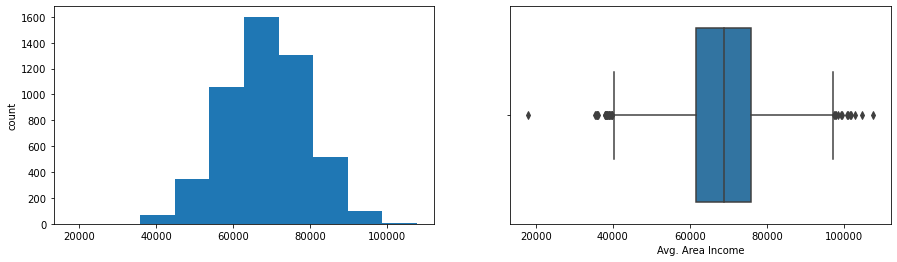

Avg. Area House Age
Skew : -0.01


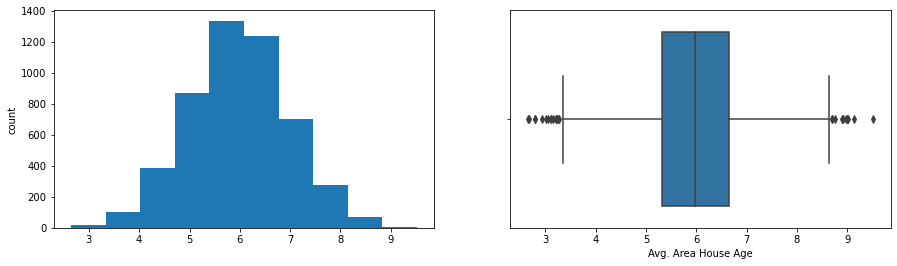

Avg. Area Number of Rooms
Skew : -0.04


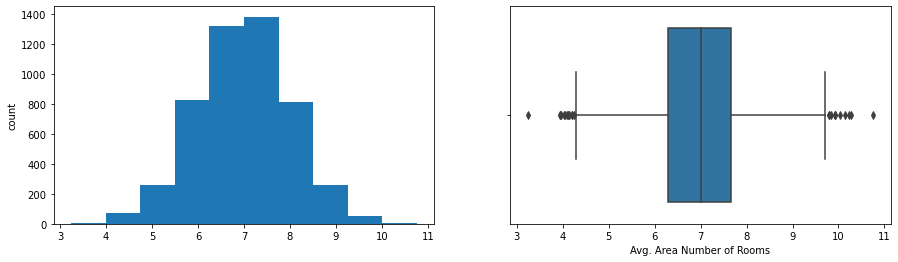

Avg. Area Number of Bedrooms
Skew : 0.38


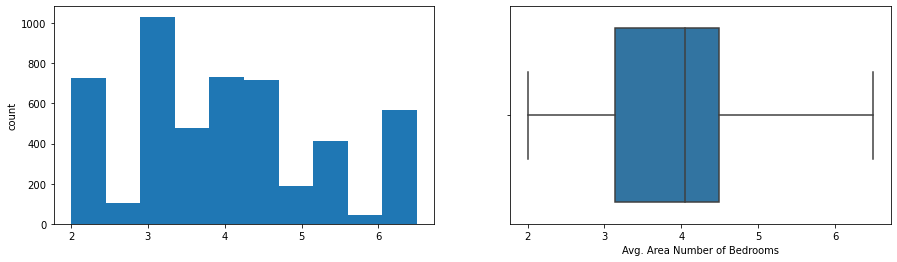

Area Population
Skew : 0.05


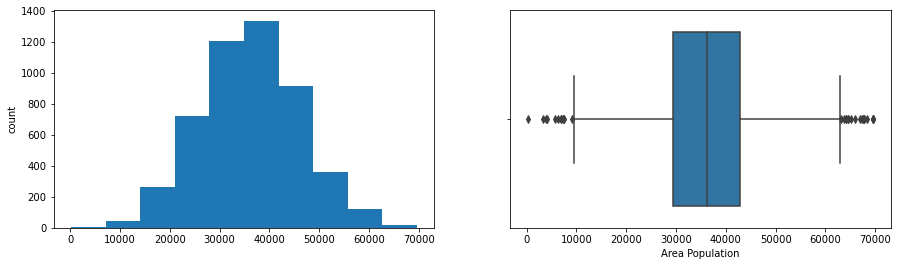

Price
Skew : -0.0


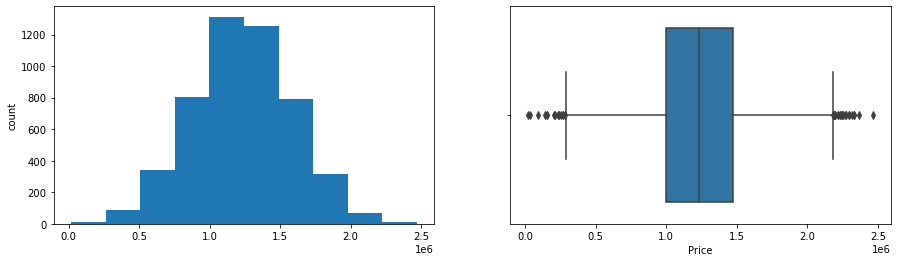

In [107]:
#Visualise data as histograms and box plots.

for col in df.columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

<AxesSubplot:>

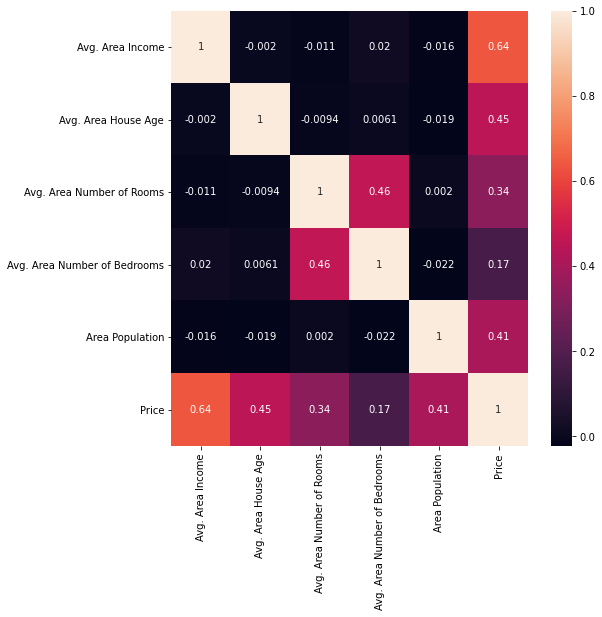

In [108]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(8,8))  
sns.heatmap(corrmat,annot=True)

In [109]:

#Separate predictor and target values

Y = pd.DataFrame(df[['Price']])
X = df.drop('Price', axis=1)
X.head()




,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [110]:
#Split data into trai9ning and test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
print(X_train.head(), X_test.head())
print (Y_train.head())

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2843      64163.541805             6.866750                   6.933771   
2147      80417.543941             4.737569                   6.837051   
180       61526.974448             6.593963                   9.180401   
4587      62524.556360             5.799667                   7.601512   
4787      59048.752191             5.847588                   6.585168   

      Avg. Area Number of Bedrooms  Area Population  
2843                          3.00     39354.789257  
2147                          4.32     44523.989090  
180                           6.11     27307.948031  
4587                          5.06     19113.168752  
4787                          4.46     14520.605321         Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2195      63376.707765             6.254002                   6.437478   
450       61215.576611             7.488369                   8.791775   
2475     

In [111]:
#Add a constant and run linear regression model on training data, and view summary

X_train = sm.add_constant(X_train)
model01 = sm.OLS(Y_train, X_train).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     5783.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:00:33   Log-Likelihood:                -32343.
No. Observations:                2500   AIC:                         6.470e+04
Df Residuals:                    2494   BIC:                         6.473e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.653e+06    2.4e+04   -110.513      0.000    -2.7e+06   -2.61e+06
Avg. Area Income                21.6172      0.188    115.003      0.000      21.249      21.986
Avg. Area House Age           1.661e+05   2028.543     81.882      0.000    1.62e+05     1.7e+05
Avg. Area Number of Rooms     1.225e+05   2243.822     54.609      0.000    1.18e+05    1.27e+05
Avg. Area Number of Bedrooms  1556.4762   1819.239      0.856      0.392   -2010.897    5123.850
Area Population                 15.1683      0.202     75.018      0.000      14.772      15.565
==============================================================================
Omnibus:                        4.189   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.655
Skew:                           0.000   Prob(JB):                        0.161
Kurtosis:                       2.813   Cond. No.                     9.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#Add a constant and run linear regression model on test data, and view summary

X_test = sm.add_constant(X_test)
model01_test = sm.OLS(Y_test, X_test).fit()
model01_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5401.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:00:33   Log-Likelihood:                -32369.
No. Observations:                2500   AIC:                         6.475e+04
Df Residuals:                    2494   BIC:                         6.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.622e+06   2.45e+04   -106.818      0.000   -2.67e+06   -2.57e+06
Avg. Area Income                21.5381      0.192    111.973      0.000      21.161      21.915
Avg. Area House Age           1.652e+05   2056.035     80.332      0.000    1.61e+05    1.69e+05
Avg. Area Number of Rooms     1.188e+05   2301.526     51.623      0.000    1.14e+05    1.23e+05
Avg. Area Number of Bedrooms  1754.7913   1885.279      0.931      0.352   -1942.082    5451.665
Area Population                 15.2374      0.206     73.862      0.000      14.833      15.642
==============================================================================
Omnibus:                        1.615   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.616
Skew:                           0.028   Prob(JB):                        0.446
Kurtosis:                       2.889   Cond. No.                     9.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
#Since Average Area Number of Bedrooms is not statistically significant (p value greater than 0.05),
#run linear regression model on training data, and view summary

X = df.drop(['Price','Avg. Area Number of Rooms'], axis=1)
X.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

X_train = sm.add_constant(X_train)
model01 = sm.OLS(Y_train, X_train).fit()
model01.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2828.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:00:33   Log-Likelihood:                -33356.
No. Observations:                2500   AIC:                         6.672e+04
Df Residuals:                    2495   BIC:                         6.675e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.945e+06   3.09e+04    -63.041      0.000   -2.01e+06   -1.88e+06
Avg. Area Income                21.2699      0.279     76.273      0.000      20.723      21.817
Avg. Area House Age           1.645e+05   3083.422     53.343      0.000    1.58e+05    1.71e+05
Avg. Area Number of Bedrooms  4.557e+04   2463.120     18.502      0.000    4.07e+04    5.04e+04
Area Population                 15.4122      0.303     50.812      0.000      14.817      16.007
==============================================================================
Omnibus:                        5.245   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.598
Skew:                           0.063   Prob(JB):                       0.0609
Kurtosis:                       3.195   Cond. No.                     8.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
#Since Average Area Number of Bedrooms is not statistically significant (p value greater than 0.05),
#run linear regression model on test data, and view summary

X_test = sm.add_constant(X_test)
model01_test = sm.OLS(Y_test, X_test).fit()
model01_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3069.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:00:33   Log-Likelihood:                -33246.
No. Observations:                2500   AIC:                         6.650e+04
Df Residuals:                    2495   BIC:                         6.653e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.967e+06   2.94e+04    -66.951      0.000   -2.02e+06   -1.91e+06
Avg. Area Income                21.4373      0.276     77.586      0.000      20.896      21.979
Avg. Area House Age           1.638e+05   2879.821     56.885      0.000    1.58e+05    1.69e+05
Avg. Area Number of Bedrooms   4.89e+04   2331.432     20.973      0.000    4.43e+04    5.35e+04
Area Population                 15.2453      0.293     52.111      0.000      14.672      15.819
==============================================================================
Omnibus:                        1.185   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.188
Skew:                           0.053   Prob(JB):                        0.552
Kurtosis:                       2.991   Cond. No.                     7.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
#Evaluate metrics to measure model performance

y_train_pred = model01.predict(X_train)
y_test_pred = model01.predict(X_test)

print('Mean Squared Error: ', model01.scale)

print("s (Mean Root Squared Error): ", np.sqrt(model01.scale))

print("MAEBaseline - Mean Absolute Error training - baseline: ", mean_absolute_error(Y_train,  y_train_pred))

print("MAERegression- Mean Absolute Error test - regression: ", mean_absolute_error(Y_test,  y_test_pred))

Mean Squared Error:  22766033334.371323
s (Mean Root Squared Error):  150884.1719146555
MAEBaseline - Mean Absolute Error training - baseline:  119109.49837482648
MAERegression- Mean Absolute Error test - regression:  115330.07735070064


In [116]:
#Run model and predict values for training dataset predictor values
Y_hat = model01.predict(X_train)


C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


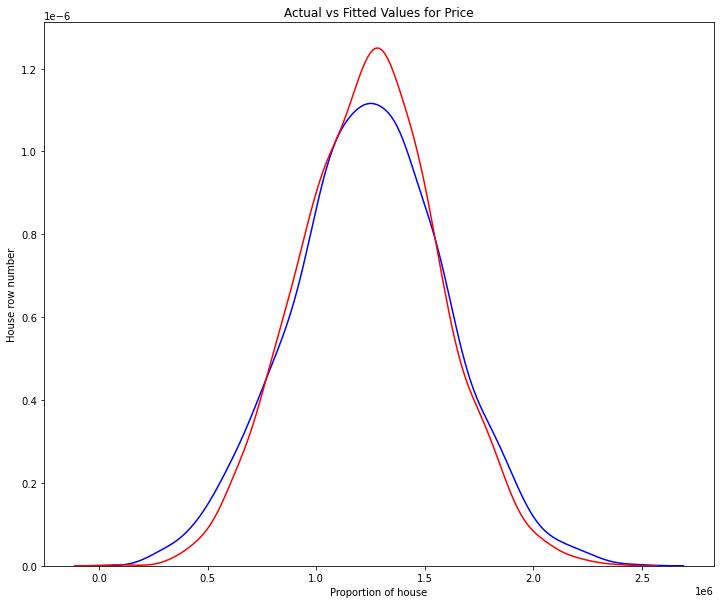

In [117]:
#Visualise actual vs predicted values on a chart.  There is fairly close correspondence except at high house prices. 

width = 12
height = 10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y_train, hist=False, color="b", label="Actual V")
sns.distplot(Y_hat, hist=False, color="r", label="Fitted V" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Proportion of house')
plt.ylabel('House row number')

plt.show()
plt.close()